# Tutorial - Text Mining - Classification 

We will predict the category of discussion posts in a newsgroup.

**The unit of analysis is a discussion post**

### Import common packages

In [1]:
import pandas as pd
import numpy as np

np.random_seed = 1

### Load data

In [2]:
news = pd.read_csv('https://raw.githubusercontent.com/prof-tcsmith/data/master/news.csv')

news.shape


(597, 5)

In [3]:
news.head(5)

,TEXT,graphics,hockey,medical,newsgroup
0,I have a few reprints left of chapters from my...,1,0,0,graphics
1,"gnuplot, etc. make it easy to plot real valued...",1,0,0,graphics
2,Article-I.D.: snoopy.1pqlhnINN8k1 References: ...,1,0,0,graphics
3,"Hello, I am looking to add voice input capabil...",1,0,0,graphics
4,I recently got a file describing a library of ...,1,0,0,graphics


### Check for missing values

In [4]:
news[['TEXT']].isna().sum()

TEXT    0
dtype: int64

## Assign the input variable to X and the target variable to y

In [5]:
X = news['TEXT']

This is a multi-class classification problem. There are three categories we will predict:<br>
Whether a post is "graphics," "hockey," or "medical" related

In [6]:
y = news['newsgroup']
y.unique()

array(['graphics', 'hockey', 'medical'], dtype=object)

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
print(le.classes_)
y = le.transform(y)

y


['graphics' 'hockey' 'medical']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Split the data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
X_train.shape, y_train.shape

((417,), (417,))

In [10]:
X_test.shape, y_test.shape

((180,), (180,))

In [11]:
X_train.head(5)

331    In article < 115330@bu.edu> icop@csa.bu.edu (A...
101    This past week I've been playing with some of ...
582    In article < 1993Apr14.184444.24065@galileo.cc...
429    Article-I.D.: ra.C526Hv.LCL References: < 1993...
563    In article < noringC5Fnx2.2v2@netcom.com> nori...
Name: TEXT, dtype: object

In [12]:
y_train[:5]

array([1, 0, 2, 2, 2])

## Sklearn: Text preparation

For simplicity (and focus), we will not do any text cleaning or preprocessing. We will just use the raw text as input to the model. See the text mining fundamentals tutorial for more details on text cleaning and preprocessing.

In [13]:
#TfidfVectorizer includes pre-processing, tokenization, filtering stop words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', lowercase=True, token_pattern="[^\W\d_]+")

X_train = tfidf_vect.fit_transform(X_train)

**Notice in the previous step that we use `fit_transform` on TRAIN. When we transform the TEST data, we need to use `transform` only. This enables us to keep the number of columns (features) the same across the data sets. Otherwise, they WILL be different, and no model will work!**

In [14]:
# Perform the TfidfVectorizer transformation
# Be careful: We are using the train fit to transform the test data set. Otherwise, the test data 
# features will be very different and match the train set!!!

X_test = tfidf_vect.transform(X_test)


In [15]:
X_train.shape, X_test.shape

((417, 9705), (180, 9705))

In [16]:
# These data sets are "sparse matrix". We can't see them unless we convert using toarray()
X_train

<417x9705 sparse matrix of type '<class 'numpy.float64'>'
	with 29434 stored elements in Compressed Sparse Row format>

In [17]:
# These data sets are "sparse matrix". We can't see them unless we convert using toarray()
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Latent Semantic Analysis (Singular Value Decomposition)

In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, n_iter=10) #n_components is the number of topics, which should be less than the number of features

X_train= svd.fit_transform(X_train)
X_test = svd.transform(X_test)


In [19]:
X_train.shape, X_test.shape

((417, 300), (180, 300))

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier 

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1) 
_ = rnd_clf.fit(X_train, y_train)

### Evaluating Model Performance

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_train = rnd_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(f"Train acc: {accuracy_score(y_train, y_pred_train):.4f}")

Train acc: 0.9880


In [23]:
#Test accuracy
y_pred_test = rnd_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Train acc: {accuracy_score(y_test, y_pred_test):.4f}")

Train acc: 0.8667


In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[36,  0,  8],
       [ 2, 60,  6],
       [ 6,  2, 60]])

## Stochastic Gradient Descent Classifier

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=100)
_ = sgd_clf.fit(X_train, y_train)

### Evaluating Model Performance

In [26]:
#Train accuracy
y_pred_train = sgd_clf.predict(X_train)
print(f"Train acc: {accuracy_score(y_train, y_pred_train):.4f}")

Train acc: 0.9952


In [27]:
#Test accuracy
y_pred_test = sgd_clf.predict(X_test)
print(f"Train acc: {accuracy_score(y_train, y_pred_train):.4f}")

Train acc: 0.9952


In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[42,  0,  2],
       [ 2, 63,  3],
       [ 3,  0, 65]])

# Deep Neural Network using Keras

Epoch 1/10


2024-03-26 17:20:45.968076: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-26 17:20:45.968260: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-26 17:20:45.968292: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-26 17:20:45.968372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-26 17:20:45.968429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-03-26 17:20:46.600574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2604 - loss: 2.8985 - val_accuracy: 0.6000 - val_loss: 2.6481
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5336 - loss: 2.3218 - val_accuracy: 0.4278 - val_loss: 1.8992
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5919 - loss: 1.4821 - val_accuracy: 0.6389 - val_loss: 1.1618
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7142 - loss: 0.9843 - val_accuracy: 0.8944 - val_loss: 0.9245
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9294 - loss: 0.8032 - val_accuracy: 0.9222 - val_loss: 0.7952
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9925 - loss: 0.6411 - val_accuracy: 0.9444 - val_loss: 0.6435
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9965 - loss: 0.4547 - val_accuracy: 0.9389 - val_loss: 0.5053
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9939 - loss: 0.3110 - val_accuracy: 0.9500 - val_loss: 0.3967

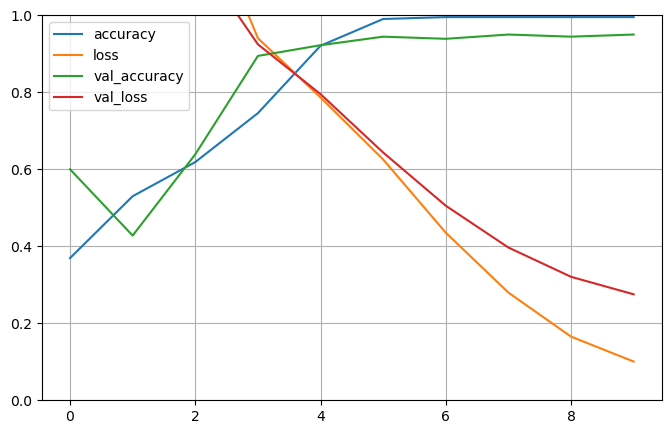

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(20, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [31]:
#Train accuracy

#y_pred_train = model.predict_classes(X_train)

y_pred_train=model.predict(X_train) 
y_pred_train=np.argmax(y_pred_train,axis=1)

print(f"Train acc: {accuracy_score(y_train, y_pred_train):.4f}")

#Test accuracy

# y_pred_test = model.predict_classes(X_test)
y_pred_test=model.predict(X_test) 
y_pred_test=np.argmax(y_pred_test,axis=1)

print(f"Train acc: {accuracy_score(y_test, y_pred_test):.4f}")

# Confusion Matrix

confusion_matrix(y_test, y_pred_test)



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train acc: 0.9952
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train acc: 0.9500


array([[43,  0,  1],
       [ 2, 65,  1],
       [ 4,  1, 63]])